In [1]:
# ASOS data (5 min)
# Get reanalysis (hourly)
# load dataset and combine
# Correlation between reanalysis and observation

In [32]:
import pandas as pd
import xarray as xr
import metpy.calc as mpcalc
from metpy.units import units
import matplotlib.pyplot as plt
import glob
from matplotlib.ticker import PercentFormatter

In [3]:
!pwd

/home/jovyan


In [4]:
# read data
path = '/home/jovyan/'
path2 = '/home/jovyan/Reanalysis data_2017/'
file1 = 'EYW_NEW.csv'
file2 = 'ERA5_TMP_EYW_DATA.nc'
asos_data = pd.read_csv(path + file1, na_values = 'M')

In [5]:
#asos_data
#asos_data.keys()
asos_data['valid(UTC)'] = pd.to_datetime(asos_data['valid(UTC)']) #converting time column to pandas datetime column
asos_data = asos_data.set_index('valid(UTC)') # sets identifying column

In [6]:
asos_data['tmpc'] = asos_data['tmpf'] * 5/9 - 32
asos_data

,station,station_name,lat,lon,tmpf,dwpf,sknt,drct,tmpc
valid(UTC),,,,,,,,,
2017-01-01 00:00:00,EYW,Key West,24.5561,-81.7596,75.0,65.0,15.0,119.0,9.666667
2017-01-01 11:00:00,EYW,Key West,24.5561,-81.7596,75.0,71.0,10.0,116.0,9.666667
2017-01-01 12:00:00,EYW,Key West,24.5561,-81.7596,76.0,72.0,9.0,102.0,10.222222
2017-01-01 13:00:00,EYW,Key West,24.5561,-81.7596,76.0,72.0,10.0,114.0,10.222222
2017-01-01 14:00:00,EYW,Key West,24.5561,-81.7596,77.0,72.0,10.0,122.0,10.777778
...,...,...,...,...,...,...,...,...,...
2017-12-31 19:00:00,EYW,Key West,24.5561,-81.7596,72.0,56.0,9.0,11.0,8.000000
2017-12-31 20:00:00,EYW,Key West,24.5561,-81.7596,72.0,50.0,4.0,77.0,8.000000
2017-12-31 21:00:00,EYW,Key West,24.5561,-81.7596,70.0,57.0,7.0,127.0,6.888889


<Axes: xlabel='valid(UTC)'>

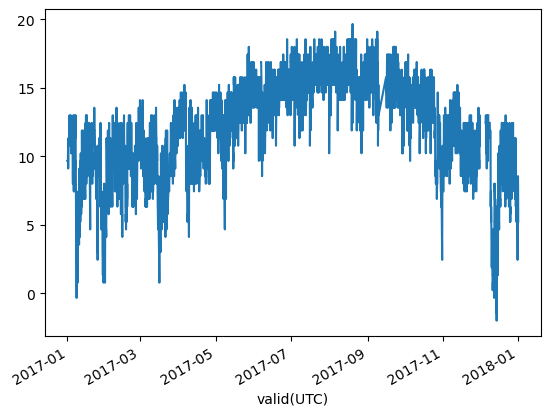

In [7]:
#asos_data['sknt']
asos_data['tmpc'].plot()

In [8]:
asos_data.keys()

Index(['station', 'station_name', 'lat', 'lon', 'tmpf', 'dwpf', 'sknt', 'drct',
       'tmpc'],
      dtype='object')

In [9]:
# Convert from 5 min data to hourly data

asos_without_station = asos_data.drop(['station_name', 'station', 'tmpf', 'sknt', 'drct', 'dwpf', 'lat', 'lon'], axis = 1) #drops string values 
#asos_without_station
asos_hourly_data = asos_without_station.resample('1h').mean()

In [10]:
asos_hourly_data

,tmpc
valid(UTC),
2017-01-01 00:00:00,9.666667
2017-01-01 01:00:00,NaN
2017-01-01 02:00:00,NaN
2017-01-01 03:00:00,NaN
2017-01-01 04:00:00,NaN
...,...
2017-12-31 19:00:00,8.000000
2017-12-31 20:00:00,8.000000
2017-12-31 21:00:00,6.888889


<Axes: xlabel='valid(UTC)'>

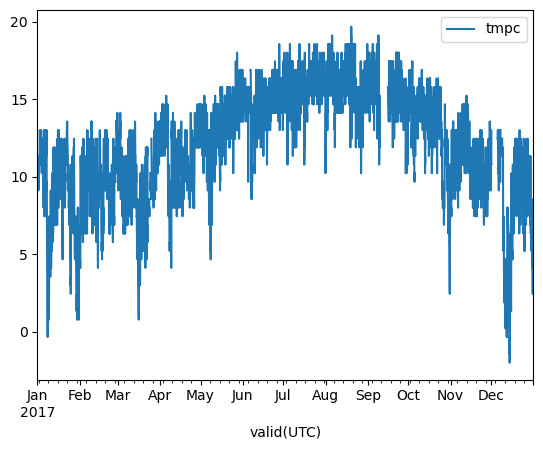

In [11]:
asos_hourly_data.plot() #plot data

In [12]:
EYW_reanalysis = xr.open_dataset(path2 + file2)
#EYW_reanalysis = xr.open_dataset(path+file2)

In [13]:
EYW_reanalysis

<xarray.Dataset> Size: 3MB
Dimensions:     (valid_time: 8760, latitude: 9, longitude: 9)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 70kB 2017-01-01 ... 2017-12-31T23...
  * latitude    (latitude) float64 72B 25.5 25.25 25.0 24.75 ... 24.0 23.75 23.5
  * longitude   (longitude) float64 72B -82.7 -82.45 -82.2 ... -80.95 -80.7
    expver      (valid_time) <U4 140kB ...
Data variables:
    t2m         (valid_time, latitude, longitude) float32 3MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-03-05T16:21 GRIB to CDM+CF via cfgrib-0.9.1...

In [14]:
#sleecting nearest pt to asos

EYW_reanalysis_lat_lon = EYW_reanalysis.sel(longitude = -81.7596, latitude = 24.5561, method = 'nearest')

In [15]:
EYW_reanalysis_lat_lon

<xarray.Dataset> Size: 245kB
Dimensions:     (valid_time: 8760)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 70kB 2017-01-01 ... 2017-12-31T23...
    latitude    float64 8B 24.5
    longitude   float64 8B -81.7
    expver      (valid_time) <U4 140kB ...
Data variables:
    t2m         (valid_time) float32 35kB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-03-05T16:21 GRIB to CDM+CF via cfgrib-0.9.1...

In [16]:
EYW_reanalysis_tabular = EYW_reanalysis_lat_lon.to_dataframe()#.drop(['z','r','t'], axis = 1) Used if we have each variable

In [17]:
EYW_reanalysis_tabular

,number,latitude,longitude,expver,t2m
valid_time,,,,,
2017-01-01 00:00:00,0,24.5,-81.7,0001,297.665283
2017-01-01 01:00:00,0,24.5,-81.7,0001,297.906494
2017-01-01 02:00:00,0,24.5,-81.7,0001,298.076538
2017-01-01 03:00:00,0,24.5,-81.7,0001,298.177246
2017-01-01 04:00:00,0,24.5,-81.7,0001,298.232300
...,...,...,...,...,...
2017-12-31 19:00:00,0,24.5,-81.7,0001,292.872314
2017-12-31 20:00:00,0,24.5,-81.7,0001,293.065796
2017-12-31 21:00:00,0,24.5,-81.7,0001,293.349792


In [18]:
EYW_reanalysis_tabular['tmpc'] = EYW_reanalysis_tabular['t2m'] - 273.15

In [19]:
final_frame = EYW_reanalysis_tabular.reset_index().set_index('valid_time').drop(['latitude', 't2m', 'longitude', 'number', 'expver'], axis = 1) #resetting index
final_frame

,tmpc
valid_time,
2017-01-01 00:00:00,24.515289
2017-01-01 01:00:00,24.756500
2017-01-01 02:00:00,24.926544
2017-01-01 03:00:00,25.027252
2017-01-01 04:00:00,25.082306
...,...
2017-12-31 19:00:00,19.722321
2017-12-31 20:00:00,19.915802
2017-12-31 21:00:00,20.199799


In [20]:
#final_frame['u']
#final_frame['v']

In [21]:
#combining datasets
#calculate wind speed from u and v components

#u_wind_era = final_frame['u10'].values * units('m/s')

#u_wind_era

#v_wind_era = final_frame['v10'].values * units('m/s')

#wind_speed_era = mpcalc.wind_speed(u = u_wind_era, v = v_wind_era)
#wind_speed_era

In [22]:
#wind_direction_era = mpcalc.wind_direction(u = u_wind_era, v = v_wind_era)
#wind_direction_era

In [23]:
#Adding new wind speed and direction to dataframe final_frame

#final_frame['wind_speed_era'] = wind_speed_era

#final_frame['wind_direction_era'] = wind_direction_era

final_frame

,tmpc
valid_time,
2017-01-01 00:00:00,24.515289
2017-01-01 01:00:00,24.756500
2017-01-01 02:00:00,24.926544
2017-01-01 03:00:00,25.027252
2017-01-01 04:00:00,25.082306
...,...
2017-12-31 19:00:00,19.722321
2017-12-31 20:00:00,19.915802
2017-12-31 21:00:00,20.199799


In [24]:
# comparing both datasets from ASOS and era5

combined_dataset = pd.merge(asos_hourly_data, final_frame, left_index = True, right_index= True, how = 'inner')

combined_dataset

,tmpc_x,tmpc_y
valid(UTC),,
2017-01-01 00:00:00,9.666667,24.515289
2017-01-01 01:00:00,NaN,24.756500
2017-01-01 02:00:00,NaN,24.926544
2017-01-01 03:00:00,NaN,25.027252
2017-01-01 04:00:00,NaN,25.082306
...,...,...
2017-12-31 19:00:00,8.000000,19.722321
2017-12-31 20:00:00,8.000000,19.915802
2017-12-31 21:00:00,6.888889,20.199799


In [25]:
combined_dataset['ASOS_tmp'] = combined_dataset['tmpc_x']
combined_dataset['ERA5_tmp'] = combined_dataset['tmpc_y']

In [26]:
corr_coef = combined_dataset['ASOS_tmp'].corr(combined_dataset['ERA5_tmp']) #correlation coefficient


In [27]:
correlation_percentage = (corr_coef * corr_coef) * 100 #find correlation percentage

print(f'{correlation_percentage} %')

82.67770597476523 %


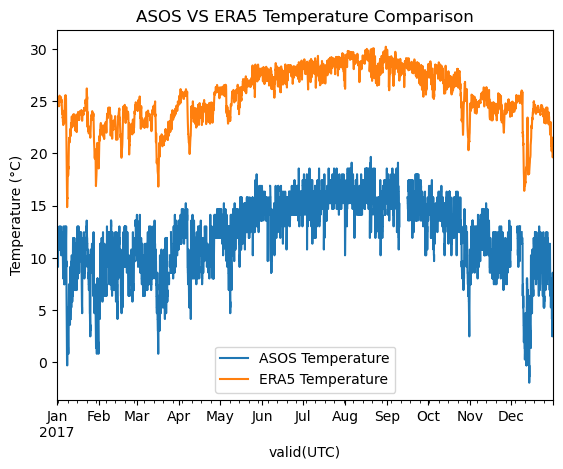

In [38]:
ax = combined_dataset[['ASOS_tmp', 'ERA5_tmp']].plot(title = 'ASOS VS ERA5 Temperature Comparison')
ax.legend(['ASOS Temperature', 'ERA5 Temperature'])
ax.set_ylabel(r'Temperature (°C)')
plt.savefig('Line_compare_ASOS_ERA5_tmpc.png', bbox_inches = 'tight',dpi=300)

<Axes: xlabel='ASOS_tmp', ylabel='ERA5_tmp'>

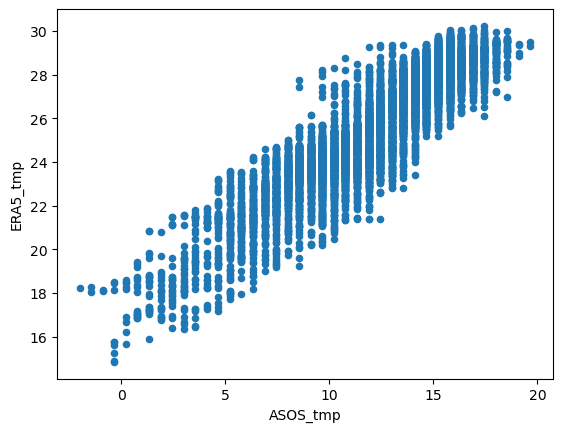

In [29]:
combined_dataset[['ASOS_tmp', 'ERA5_tmp']].plot(x = 'ASOS_tmp', y = 'ERA5_tmp', kind = 'scatter')

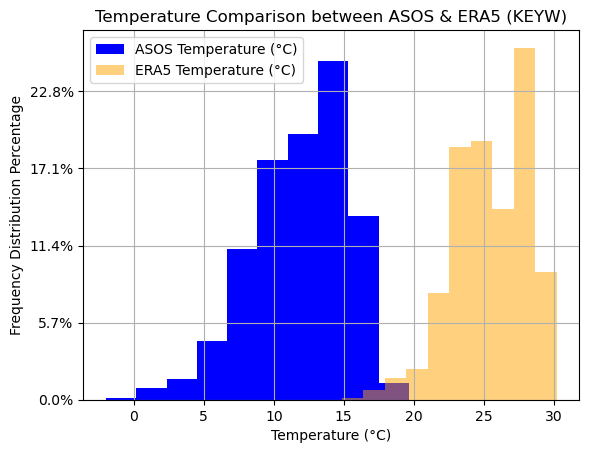

In [34]:
fig, ax = plt.subplots() #create a figure and axis object to control the plots

combined_dataset['ASOS_tmp'].hist(ax = ax, color = 'b', label = 'ASOS Temperature (°C)')
combined_dataset['ERA5_tmp'].hist(ax = ax, color = 'orange', alpha = 0.5, label = 'ERA5 Temperature (°C)')

ax.legend()

ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Frequency Distribution Percentage')
plt.gca().yaxis.set_major_formatter(PercentFormatter(len(combined_dataset)))

ax.set_title('Temperature Comparison between ASOS & ERA5 (KEYW)')
plt.savefig('Temperature_compare_ASOS_ERA5.png',dpi=300)